<a href="https://colab.research.google.com/github/sznajder/Notebooks/blob/master/Building_Perceptron_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Copied from 
https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/perceptron.py

In this notebook, we are going to build a neural network called the Perceptron using numpy and successfully train.

## What is a neural network?
A neural network is a type of machine learning model which is inspired by our neurons in the brain where many neurons are connected with many other neurons to translate an input to an output (simple right?). Mostly we can look at any machine learning model and think of it as a function which takes an input and produces the desired output; it's the same with a neural network.

## What is a Perceptron?

The perceptron is an artificial neuron that constitutes the basic building block of many neural network architectures. Think of the perceptron as function which takes a bunch of inputs multiply them with weights and add a bias term and activate this linear transformation with a nonlinearity to generate an output.<br/>
<center>$Z= \Theta( W \cdot X + {b}) $<center> <br/>
<img src="https://raw.githubusercontent.com/aayushmnit/Deep_learning_explorations/master/1_MLP_from_scratch/perceptron.png" align='center'>
<center>*Fig 1: Perceptron image*<center> <br/>
<div align='right'>
</div>


The nonlinear activation is usually a sigmoid function that will return a number between 0 and 1.

<img width="512" alt="SigmoidFunction" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/SigmoidFunction.png/512px-SigmoidFunction.png">

<center>*Fig 2: Sigmoid Function*<center> <br/>

Now, if we stack together a bunch of these perceptrons, side by side, it becomes what we call a Dense layer. <br/>
<center>**Dense layer,** $\bf f(X)= W \cdot X + b$</center> <br/>
*Note that bias term is now a vector and W is a weight matrix* <br/>
<img src="https://raw.githubusercontent.com/aayushmnit/Deep_learning_explorations/master/1_MLP_from_scratch/single_layer_mlp.png" align ='center'>
<center>***Fig: Single dense layer perceptron network***<center> <br/>
<div align='right'>*Image credit=http://www.texample.net/tikz/examples/neural-network/*</div>


Now we understand dense layer let's add a bunch of them, and that network becomes a multi-layer perceptron network.

So, to summarize a neural network needs few building blocks

- Dense layer - a fully-connected layer, $f(X)=W \cdot X + \vec{b}$
- Activation function (any nonlinear function)
- Loss function - (crossentropy in case of multi-class classification problem)
- Backprop algorithm - a stochastic gradient descent with backpropageted gradients

Let's approach them one at a time.

## Coding Starts here --

Every layer will have a forward pass and backpass implementation. Let's create a main class layer which can do a forward pass *.forward()* and Backward pass *.backward().*

In [10]:
import numpy as np


class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

        

##Training loop

Perceptron classification accuracy 1.0


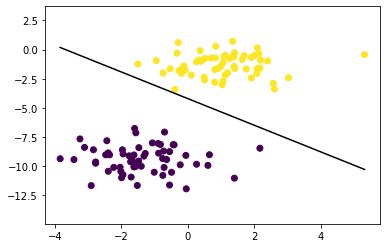

In [11]:

# Dataset
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

# Training 
    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)


# Plot results
    print("Perceptron classification accuracy", accuracy(y_test, predictions))

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
    x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

    ymin = np.amin(X_train[:, 1])
    ymax = np.amax(X_train[:, 1])
    ax.set_ylim([ymin - 3, ymax + 3])

    plt.show()
